In [1]:
%autosave 60

Autosaving every 60 seconds


# Домашнеее задание по ML №3

## Импорт библиотек и дополнительная настройка

In [2]:
# Работа с DataFrame
import pandas as pd

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk

# Интересные методы для EDA
from phik import phik_matrix
import missingno as msno

# Мат. и стат. методы
from scipy.stats import spearmanr
import numpy as np
# from rapidfuzz import fuzz, process

# Имопрт моделей
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# ColumnTransformer и Pipeline для моделей
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Отображение
from IPython.display import display
from tqdm.notebook import tqdm

In [3]:
plt.style.use('cyberpunk')

## Загрузка датасетов

In [4]:
test = pd.read_csv('test.csv')
solution = pd.read_csv('solution.csv')
train = pd.read_csv('train.csv')
sample_submition = pd.read_csv('sample_submition.csv')

## EDA-анализ

### Общая информация

In [5]:
datasets = {
    'train': train,
    'test': test,
    'solution': solution,
    'sample_submition': sample_submition
}

In [6]:
for name, dataset in datasets.items():
    print(f"========== Датасет: {name} ==========")
    display(dataset.head(3))
    print(f"Количество строк в датасете: {dataset.shape[0]}")
    print(f"Размерность датасета {dataset.shape}")

========== Датасет: train ==========


,name,_id,host_name,location_cluster,location,lat,lon,type_house,sum,min_days,amt_reviews,last_dt,avg_reviews,total_host,target
0,Belle Harbor 4 BR 2 bath- 1 bl from Beach,40327248,Sarina,Queens,Neponsit,40.57215,-73.85822,Entire home/apt,350,2,5,2019-07-07,2.88,1,334
1,"Come see Brooklyn, New York",13617520,Howard T.,Brooklyn,Clinton Hill,40.69172,-73.96934,Shared room,40,5,8,2015-02-25,0.13,1,0
2,Large 2Br on W71st & Columbus Feb 19-28,26754726,Julie,Manhattan,Upper West Side,40.77673,-73.98011,Entire home/apt,200,5,0,NaN,NaN,1,0


Количество строк в датасете: 36671
Размерность датасета (36671, 15)
========== Датасет: test ==========


,name,_id,host_name,location_cluster,location,lat,lon,type_house,sum,min_days,amt_reviews,last_dt,avg_reviews,total_host
0,Amazing 4 Bedrooms 4 Bathrooms sleeps 9,199147185,Lou,Brooklyn,Sunset Park,40.66468,-73.99785,Entire home/apt,399,1,0,NaN,NaN,5
1,Super Spacious room in Brooklyn,259427246,Nelly,Brooklyn,Bedford-Stuyvesant,40.67880,-73.92722,Private room,43,1,4,2019-06-10,2.00,3
2,Stunning 1-Bedroom NYC Apartment on the River!,30283594,Kara,Manhattan,Hell's Kitchen,40.76170,-73.99762,Entire home/apt,275,30,2,2017-09-17,0.08,121


Количество строк в датасете: 12224
Размерность датасета (12224, 14)
========== Датасет: solution ==========


,index,prediction,Usage
0,0,359,Public
1,1,343,Public
2,2,365,Public


Количество строк в датасете: 12224
Размерность датасета (12224, 3)
========== Датасет: sample_submition ==========


,index,prediction
0,0,112.825425
1,1,112.825425
2,2,112.825425


Количество строк в датасете: 12224
Размерность датасета (12224, 2)


In [7]:
for name, dataset in list(datasets.items())[:2]:
    print(f"========== Датасет: {name} ==========")
    display(dataset.info())

========== Датасет: train ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36671 entries, 0 to 36670
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              36662 non-null  object 
 1   _id               36671 non-null  int64  
 2   host_name         36653 non-null  object 
 3   location_cluster  36671 non-null  object 
 4   location          36671 non-null  object 
 5   lat               36671 non-null  float64
 6   lon               36671 non-null  float64
 7   type_house        36671 non-null  object 
 8   sum               36671 non-null  int64  
 9   min_days          36671 non-null  int64  
 10  amt_reviews       36671 non-null  int64  
 11  last_dt           29169 non-null  object 
 12  avg_reviews       29169 non-null  float64
 13  total_host        36671 non-null  int64  
 14  target            36671 non-null  int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 4

None

========== Датасет: test ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12224 entries, 0 to 12223
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              12217 non-null  object 
 1   _id               12224 non-null  int64  
 2   host_name         12221 non-null  object 
 3   location_cluster  12224 non-null  object 
 4   location          12224 non-null  object 
 5   lat               12224 non-null  float64
 6   lon               12224 non-null  float64
 7   type_house        12224 non-null  object 
 8   sum               12224 non-null  int64  
 9   min_days          12224 non-null  int64  
 10  amt_reviews       12224 non-null  int64  
 11  last_dt           9674 non-null   object 
 12  avg_reviews       9674 non-null   float64
 13  total_host        12224 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 1.3+ MB


None

Отсюда уже видно, что есть пропуски и стоит поработать с типом данных в качестве предобработке данных

In [8]:
for name, dataset in list(datasets.items())[:2]:
    print(f"========== Датасет: {name} ==========")
    display(dataset.describe())

========== Датасет: train ==========


,_id,lat,lon,sum,min_days,amt_reviews,avg_reviews,total_host,target
count,3.667100e+04,36671.000000,36671.000000,36671.000000,36671.000000,36671.000000,29169.000000,36671.000000,36671.000000
mean,6.720433e+07,40.729080,-73.951958,152.142292,7.053176,23.433667,1.365601,7.047694,112.766628
std,7.828147e+07,0.054671,0.046201,239.107973,21.539569,44.703590,1.643966,32.595427,131.583284
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.780024e+06,40.690090,-73.982970,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.053256e+07,40.723150,-73.955560,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763260,-73.935865,175.000000,5.000000,24.000000,2.010000,2.000000,227.000000
max,2.743213e+08,40.912340,-73.712990,10000.000000,1250.000000,629.000000,20.940000,327.000000,365.000000


========== Датасет: test ==========


,_id,lat,lon,sum,min_days,amt_reviews,avg_reviews,total_host
count,1.222400e+04,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,9674.000000,12224.000000
mean,6.886703e+07,40.728555,-73.952806,154.455825,6.960324,22.796875,1.396199,7.432837
std,7.958145e+07,0.054105,0.046020,243.267298,17.055669,44.086754,1.785811,34.001000
min,2.787000e+03,40.506410,-74.239140,0.000000,1.000000,0.000000,0.010000,1.000000
25%,7.913416e+06,40.690117,-73.983362,70.000000,1.000000,1.000000,0.190000,1.000000
50%,3.175526e+07,40.722765,-73.956125,106.000000,3.000000,5.000000,0.710000,1.000000
75%,1.075815e+08,40.762543,-73.937255,178.000000,5.000000,23.000000,2.040000,2.000000
max,2.741955e+08,40.913060,-73.716900,9999.000000,365.000000,607.000000,58.500000,327.000000


#### **Выводы**

1. **Общая структура данных совпадает** — признаки идентичны по составу и типам, распределения похожи, что говорит об отсутствии data drift между `train` и `test`.

2. **Признак `target` присутствует только в `train`**, его распределение сильно скошено — медиана = 45, максимум = 365, что указывает на наличие выбросов и необходимость логарифмирования.

3. **Признак `sum` имеет большой разброс и скошенность** — 75% значений ниже 180, но максимум достигает 10 000. Вероятны выбросы, возможна трансформация.

4. **Признаки `amt_reviews` и `avg_reviews` также с выбросами и перекосом** — наблюдаются высокие максимумы при относительно низких средних. Тоже необходимо логарифмическое преобразование.

5. **Признак `total_host` стабилен и дискретен** — большинство значений — 1 или 2, полезен как категориальный или счётный признак.

### Явные и неявные дубликаты

#### Неявные

Долго выполняется

#### Явные

In [9]:
for name, dataset in datasets.items():
    print(f"В датасете {name} {dataset.duplicated().sum()} дубликатов.")

В датасете train 0 дубликатов.
В датасете test 0 дубликатов.
В датасете solution 0 дубликатов.
В датасете sample_submition 0 дубликатов.


Явных дубликатов нет

### Анализ пропусков

In [10]:
for name, dataset in datasets.items():
    print(f"Количество пропусков в абсолютных и относительных значениях в {name}:")
    display(pd.DataFrame({
    'Total NaN': dataset.isna().sum(),
    'Percentage NaN': dataset.isna().mean() * 100
    }).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях в train:


,Total NaN,Percentage NaN
name,9,0.02%
_id,0,0.00%
host_name,18,0.05%
location_cluster,0,0.00%
location,0,0.00%
lat,0,0.00%
lon,0,0.00%
type_house,0,0.00%
sum,0,0.00%
min_days,0,0.00%


Количество пропусков в абсолютных и относительных значениях в test:


,Total NaN,Percentage NaN
name,7,0.06%
_id,0,0.00%
host_name,3,0.02%
location_cluster,0,0.00%
location,0,0.00%
lat,0,0.00%
lon,0,0.00%
type_house,0,0.00%
sum,0,0.00%
min_days,0,0.00%


Количество пропусков в абсолютных и относительных значениях в solution:


,Total NaN,Percentage NaN
index,0,0.00%
prediction,0,0.00%
Usage,0,0.00%


Количество пропусков в абсолютных и относительных значениях в sample_submition:


,Total NaN,Percentage NaN
index,0,0.00%
prediction,0,0.00%


#### Выводы по пропущенным значениям

1. **Наиболее значимые пропуски присутствуют в признаках `last_dt` и `avg_reviews`**, как в `train`, так и в `test`:
   - В `train`: по 7502 пропущенных значений (20.46%)
   - В `test`: по 2550 пропущенных значений (20.86%)
   - Это значительные доли — признаки требуют специальной обработки (например, замены на `0`, создание индикаторов `is_missing`, предсказания значений или чего-то ещё).

2. **Остальные признаки почти не содержат пропусков**:
   - `host_name`: 18 пропусков в `train`, 3 в `test` (≈0.02–0.05%)
   - `name`: 9 в `train`, 7 в `test`
   - Эти значения можно заполнить `Unknown` или чем-то другим.

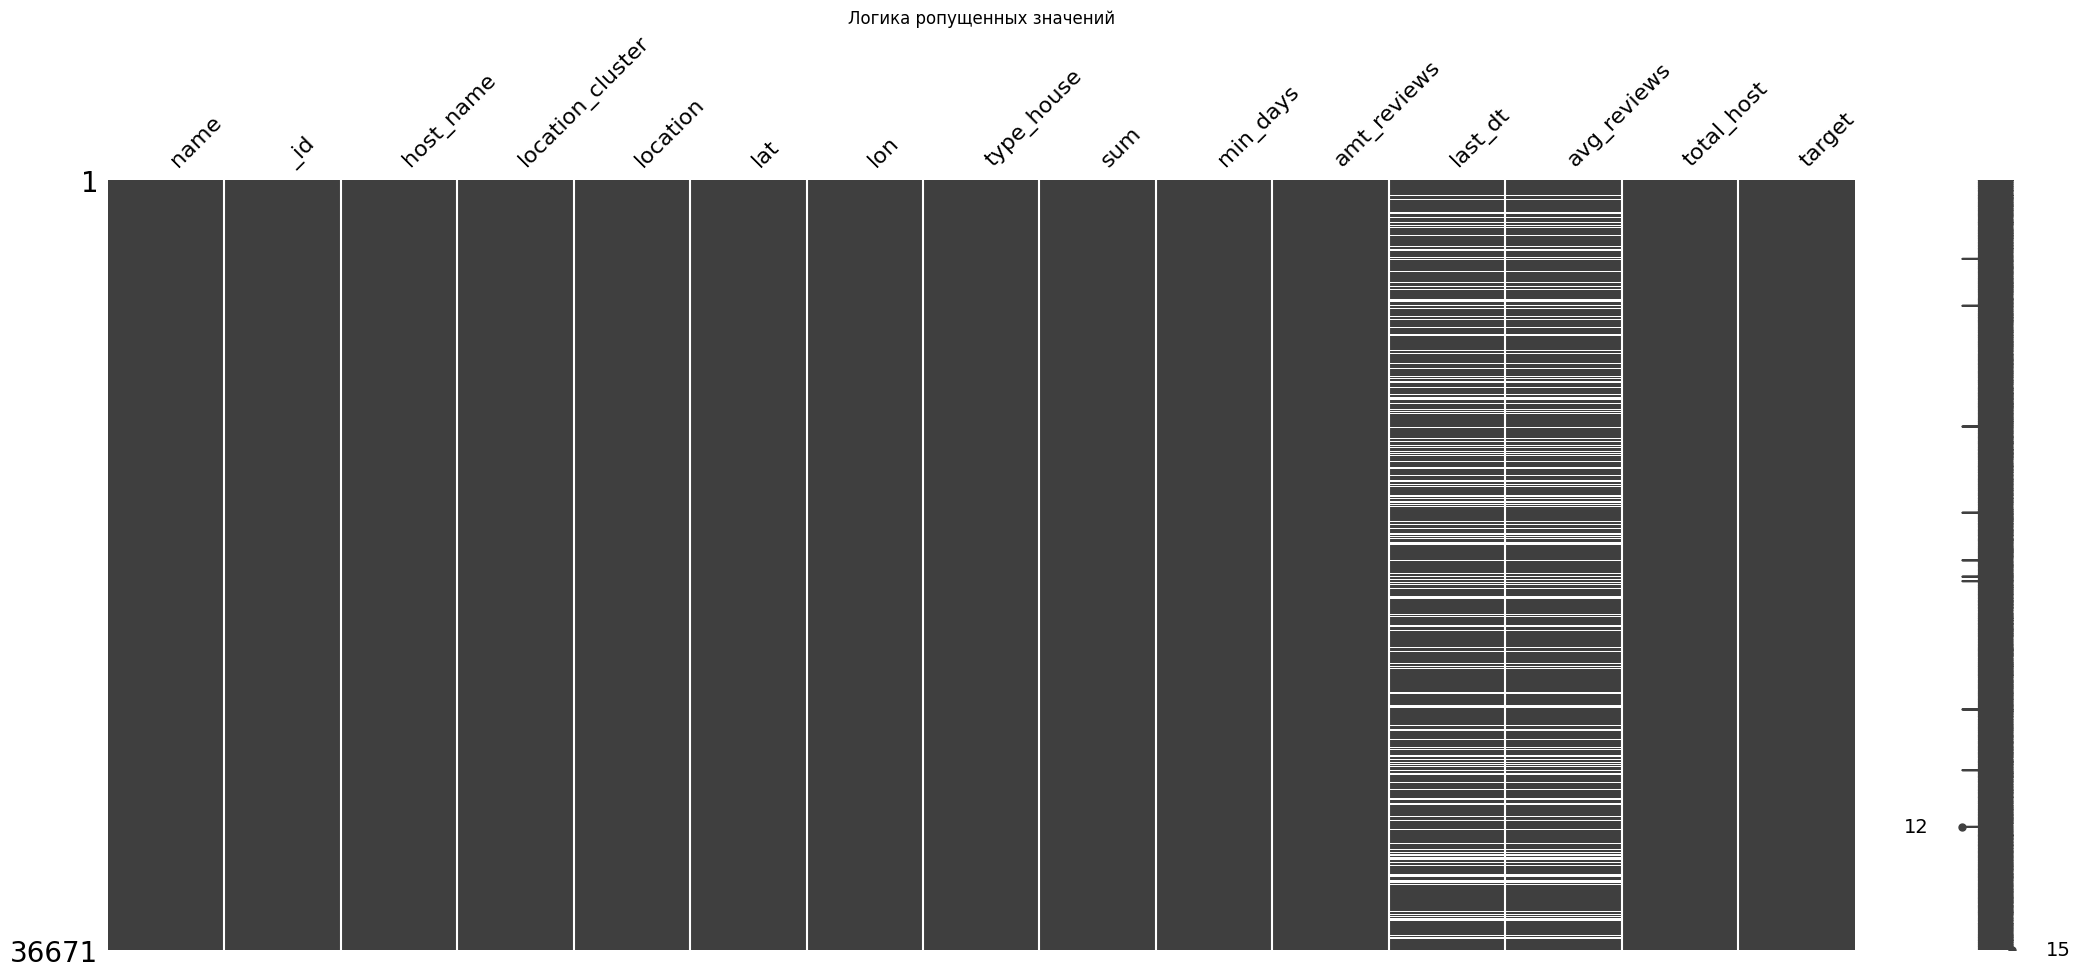

In [11]:
with plt.style.context('default'):
    msno.matrix(train)
    plt.title("Логика ропущенных значений")
    plt.show()

#### Вывод — визуальный анализ пропущенных значений (train)

1. Пропуски присутствуют только в двух признаках: `last_dt` и `avg_reviews`, все остальные признаки полностью заполнены.
2. Пропуски в `last_dt` и `avg_reviews` совпадают построчно, что может указывать на логическую связь между этими признаками.
3. Объём пропущенных значений составляет около 20% от общего числа строк, что является значительной долей и требует отдельной обработки.
4. Пропуски имеют системный характер, а не случайный, что также следует учитывать при выборе стратегии заполнения или использования этих признаков.

### Анализ выбросов

In [12]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns

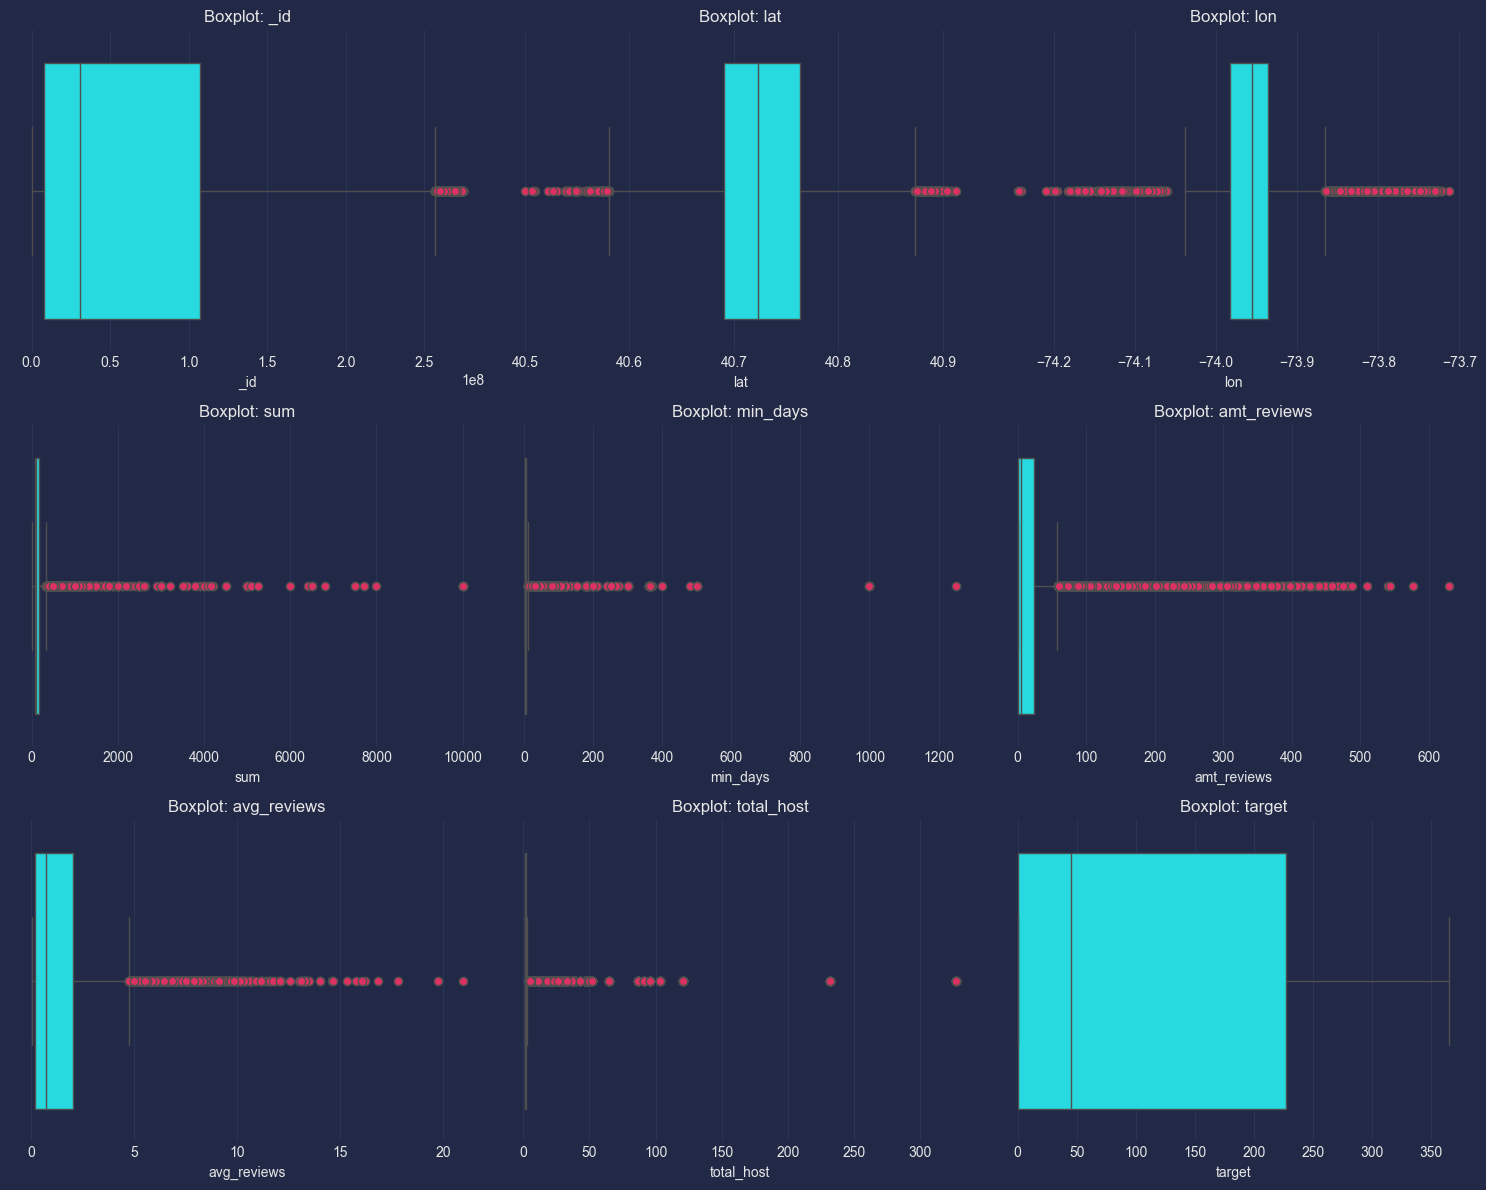

In [13]:
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # округляем вверх

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # делаем 1D массив для удобства

for i, col in enumerate(num_cols):
    sns.boxplot(x=train[col], ax=axes[i], flierprops=dict(marker='o', markerfacecolor='#DE3163', markersize=6, linestyle='none'))
    axes[i].set_title(f'Boxplot: {col}')

# Отключим лишние пустые подграфики
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
for col in num_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = train[(train[col] < lower) | (train[col] > upper)]
    num_outliers = len(outliers)
    total = train[col].notna().sum()
    percent = 100 * num_outliers / total if total > 0 else 0

    print(f'{col}: выбросов {num_outliers} из {total} ({percent:.1f}%)\n')

_id: выбросов 1103 из 36671 (3.0%)

lat: выбросов 326 из 36671 (0.9%)

lon: выбросов 2135 из 36671 (5.8%)

sum: выбросов 2216 из 36671 (6.0%)

min_days: выбросов 4920 из 36671 (13.4%)

amt_reviews: выбросов 4557 из 36671 (12.4%)

avg_reviews: выбросов 1342 из 29169 (4.6%)

total_host: выбросов 5330 из 36671 (14.5%)

target: выбросов 0 из 36671 (0.0%)



#### Вывод — анализ выбросов по числовым признакам

1. Выбросы обнаружены практически во всех числовых признаках, за исключением `target`, который не содержит выбросов по критерию IQR.
2. Наиболее высокий процент выбросов наблюдается в признаках `total_host` (14.5%), `min_days` (13.4%) и `amt_reviews` (12.4%). Это может свидетельствовать о наличии редких, экстремальных значений, которые следует либо трансформировать, либо ограничить.
3. Умеренное количество выбросов зафиксировано в `sum` (6.0%), `lon` (5.8%) и `avg_reviews` (4.6%).
4. В признаках `lat` (0.9%) и `_id` (3.0%) выбросы минимальны и вряд ли критичны для модели.
5. Распределения на boxplot-графиках подтверждают наличие длинных «хвостов» и экстремальных значений, особенно в `amt_reviews`, `sum`, `min_days`, `total_host`.
6. Большинство выбросов имеют асимметричный характер, поэтому в дальнейшем может потребоваться логарифмирование, обрезка или использование робастных моделей.

### Распределения числовых признаков

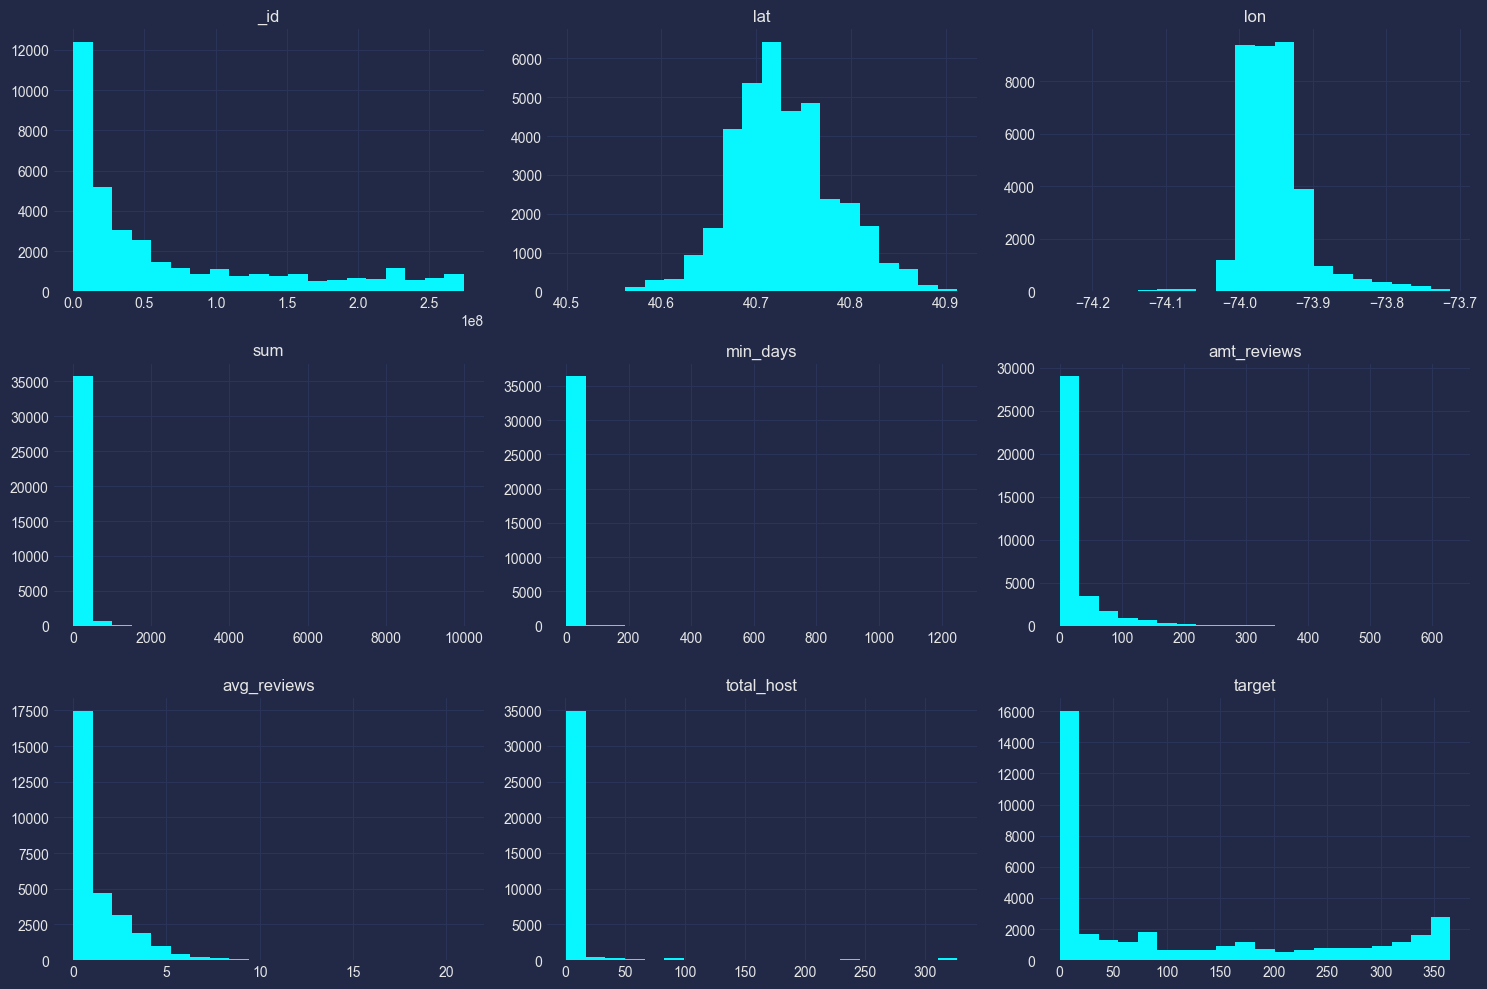

In [15]:
train[num_cols].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

#### Вывод — распределения числовых признаков

1. Большинство признаков имеют скошенные распределения с длинным правым хвостом — это `sum`, `min_days`, `amt_reviews`, `avg_reviews`, `total_host` и `target`. Для них рекомендуется логарифмическое преобразование (`log1p`) перед подачей в модель. Это подтверждает выводы, сделанные ранее.
2. `lat` и `lon` распределены ближе к нормальному, могут быть использованы без преобразований.
3. `target` характеризуется сильной концентрацией низких значений и длинным хвостом. Это подтверждает необходимость трансформации для улучшения обучаемости моделей.
4. `_id` не несёт смысловой нагрузки и не представляет интереса с точки зрения распределения — признак можно исключить из обучения и анализа.
5. Большинство признаков демонстрируют высокую плотность значений около нуля и наличие редких, но экстремальных значений. Это требует дополнительной работы с выбросами и возможного нормализующего преобразования, что подтвержается в прошлом пункте про выбросы.

### Уникальные значения по категориальным

In [16]:
train['last_dt'] = pd.to_datetime(train['last_dt'])
cat_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

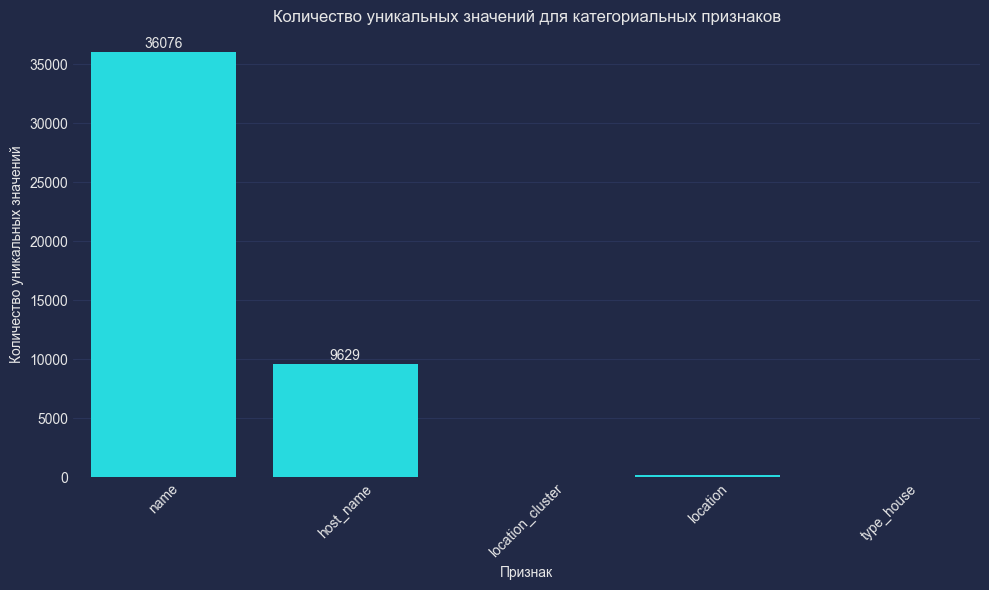

In [17]:
# Для каждого категориального признака считаем количество уникальных значений
cardinality = pd.DataFrame({
    'feature': cat_cols,
    'nunique': [train[col].nunique() for col in cat_cols]
})

# Визуализируем с помощью bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='feature', y='nunique', data=cardinality)

# Добавляем подписи с количеством уникальных значений над каждым столбцом
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height() - 500), 
                ha='center', va='bottom', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.title("Количество уникальных значений для категориальных признаков")
plt.xlabel("Признак")
plt.ylabel("Количество уникальных значений")
plt.tight_layout()
plt.show()

In [18]:
threshold = 100

high_cardinality_cols = []
for col in cat_cols:
    num_unique = train[col].nunique()
    if num_unique > threshold:
        high_cardinality_cols.append(col)
        print(f"Признак '{col}' имеет {num_unique} уникальных значений (высокая кардинальность).")

Признак 'name' имеет 36076 уникальных значений (высокая кардинальность).
Признак 'host_name' имеет 9629 уникальных значений (высокая кардинальность).
Признак 'location' имеет 220 уникальных значений (высокая кардинальность).


#### Вывод — уникальные значения в категориальных признаках

1. Признаки `name` и `host_name` имеют крайне высокую кардинальность: 36 076 и 9 629 уникальных значений соответственно. Эти признаки сложно использовать в моделях без предварительной агрегации или сокращения, так как они приведут к переобучению при прямом кодировании.
2. Признак `location` содержит 220 уникальных значений, что также считается высокой кардинальностью. Его можно обработать через frequency encoding, target encoding или группировку.
3. Признаки `location_cluster` и `type_house` имеют ограниченное количество категорий и подходят для прямого кодирования (например, one-hot или ordinal).
4. Высококардинальные признаки стоит либо исключить, либо использовать с осторожностью, применяя подходящие методы кодирования или агрегирования.

### Корреляция

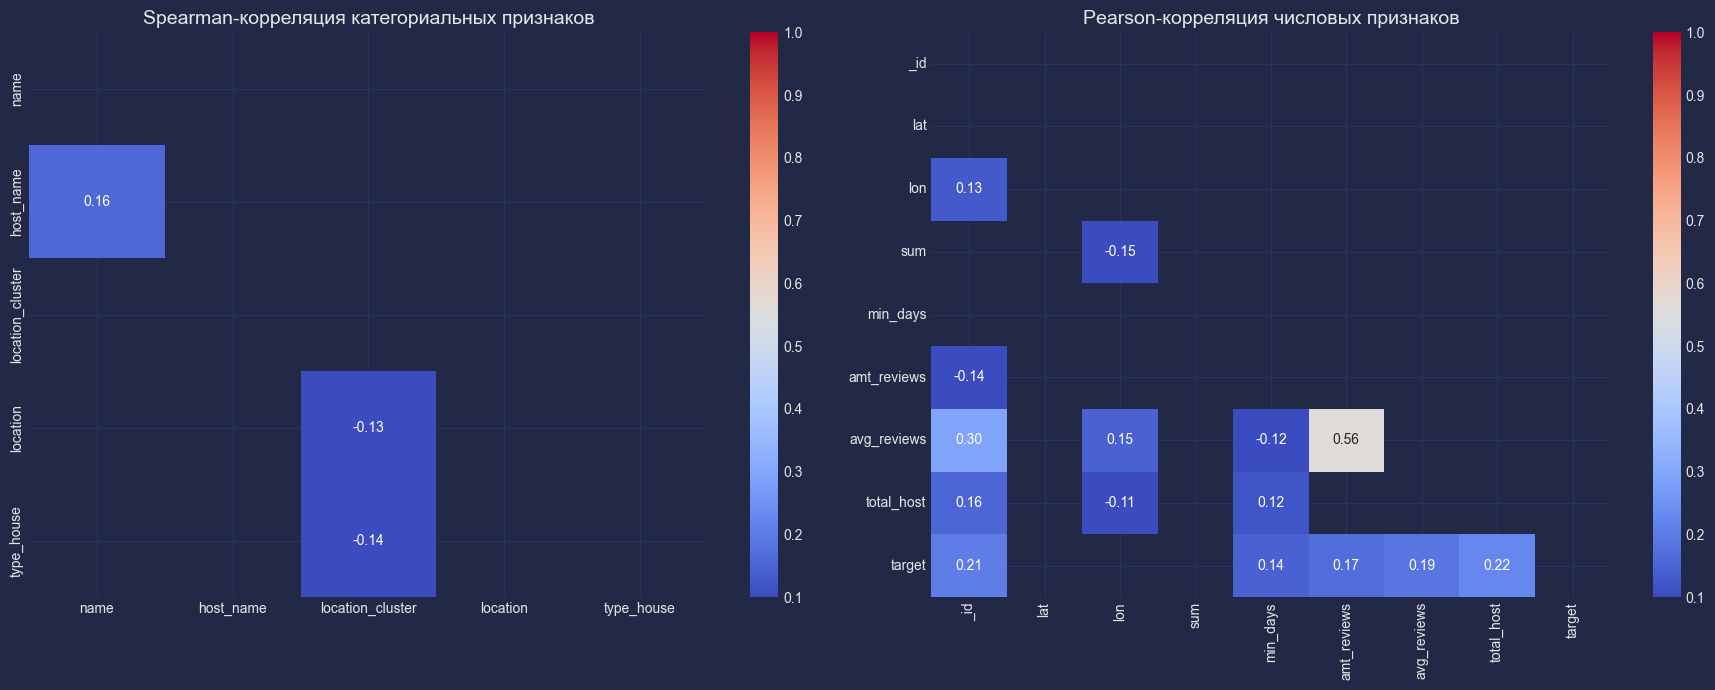

Сильно коррелирующие категориальные признаки (Spearman > 0.95):

Сильно коррелирующие числовые признаки (Pearson > 0.95):


In [19]:
# Spearman-корреляция по категориальным
spearman_corr = train[cat_cols].apply(lambda x: pd.factorize(x)[0])
spearman_corr = spearman_corr.corr(method='spearman')

mask_spearman = np.triu(np.ones_like(spearman_corr, dtype=bool))
spearman_corr_filtered = spearman_corr.copy()
spearman_corr_filtered[abs(spearman_corr_filtered) < 0.1] = np.nan

# Pearson-корреляция по числовым
corr = train[num_cols].corr(method='pearson')
mask_pearson = np.triu(np.ones_like(corr, dtype=bool))
corr_filtered = corr.copy()
corr_filtered[abs(corr_filtered) < 0.1] = np.nan

# Визуализация Spearman + Pearson
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.heatmap(spearman_corr_filtered, mask=mask_spearman, annot=True, fmt='.2f',
            cmap='coolwarm', vmin=0.1, vmax=1, ax=axes[0])
axes[0].set_title("Spearman-корреляция категориальных признаков", fontsize=14)

sns.heatmap(corr_filtered, mask=mask_pearson, annot=True, fmt='.2f',
            cmap='coolwarm', vmin=0.1, vmax=1, ax=axes[1])
axes[1].set_title("Pearson-корреляция числовых признаков", fontsize=14)

plt.tight_layout()
plt.show()

# Вывод сильно коррелирующих пар
print("Сильно коррелирующие категориальные признаки (Spearman > 0.95):")
for i in range(len(spearman_corr_filtered.columns)):
    for j in range(i + 1, len(spearman_corr_filtered.columns)):
        val = spearman_corr_filtered.iloc[i, j]
        if pd.notnull(val) and abs(val) > 0.95:
            print(f"  - {spearman_corr_filtered.columns[i]} и {spearman_corr_filtered.columns[j]} (Spearman: {val:.2f})")

print("\nСильно коррелирующие числовые признаки (Pearson > 0.95):")
for i in range(len(corr_filtered.columns)):
    for j in range(i + 1, len(corr_filtered.columns)):
        val = corr_filtered.iloc[i, j]
        if pd.notnull(val) and abs(val) > 0.95:
            print(f"  - {corr_filtered.columns[i]} и {corr_filtered.columns[j]} (Pearson: {val:.2f})")

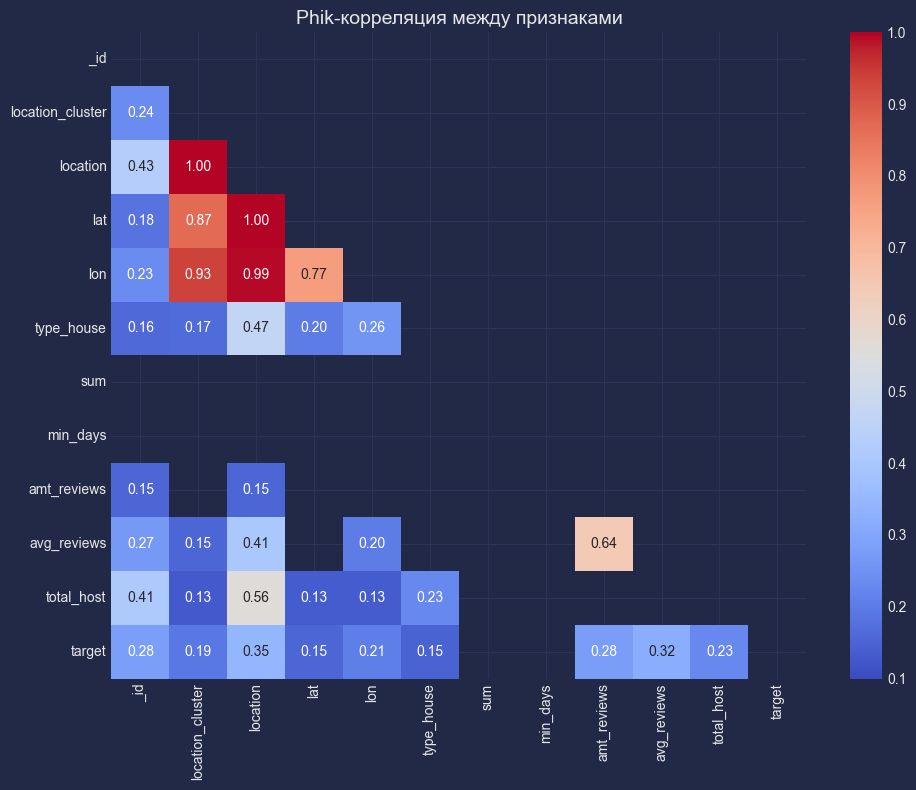

Сильно коррелирующие признаки по PhiK (> 0.95):
  - location_cluster и location (PhiK: 1.00)
  - location и lat (PhiK: 1.00)
  - location и lon (PhiK: 0.99)


In [20]:
# Исключаем признаки с высокой кардинальностью и даты
exclude_cols = ['name', 'host_name', 'last_dt']
df_phik = train.drop(columns=exclude_cols, errors='ignore')

# Вычисляем PHIK-корреляцию
phik_corr = df_phik.phik_matrix(interval_cols=num_cols)

# Маска верхнего треугольника и фильтрация слабых корреляций
mask_phik = np.triu(np.ones_like(phik_corr, dtype=bool))
phik_corr_filtered = phik_corr.copy()
phik_corr_filtered[phik_corr_filtered < 0.1] = np.nan

# Визуализация PHIK
plt.figure(figsize=(10, 8))
sns.heatmap(phik_corr_filtered, mask=mask_phik, annot=True, fmt='.2f',
            cmap='coolwarm', vmin=0.1, vmax=1)
plt.title("Phik-корреляция между признаками", fontsize=14)
plt.tight_layout()
plt.show()

# Вывод сильно коррелирующих пар
print("Сильно коррелирующие признаки по PhiK (> 0.95):")
for i in range(len(phik_corr_filtered.columns)):
    for j in range(i + 1, len(phik_corr_filtered.columns)):
        val = phik_corr_filtered.iloc[i, j]
        if pd.notnull(val) and val > 0.95:
            print(f"  - {phik_corr_filtered.columns[i]} и {phik_corr_filtered.columns[j]} (PhiK: {val:.2f})")

Теперь все же проверим возможную зависимость `last_dt` и `_id` — может, это даст что-то полезное

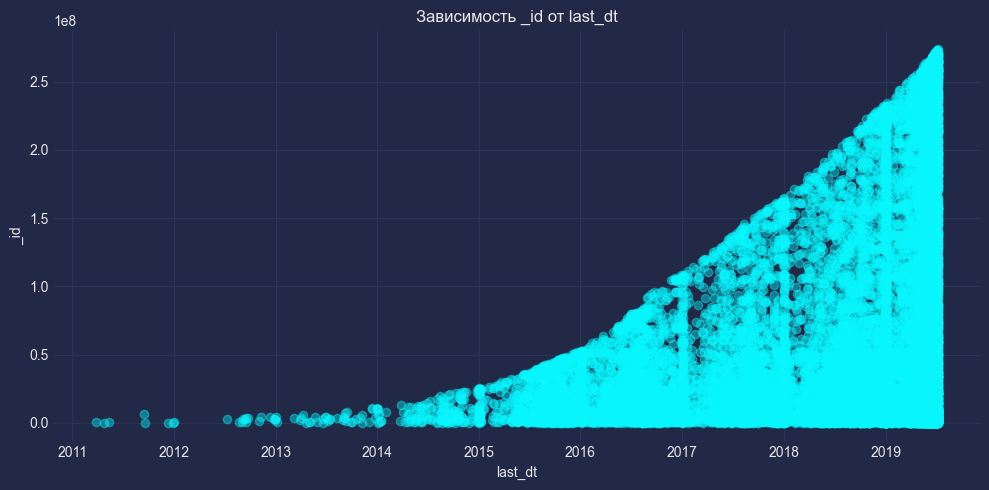

In [21]:
subset = train[['last_dt', '_id']].dropna()

plt.figure(figsize=(10, 5))
plt.scatter(subset['last_dt'], subset['_id'], alpha=0.4)
plt.xlabel('last_dt')
plt.ylabel('_id')
plt.title('Зависимость _id от last_dt')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
subset['last_dt_num'] = subset['last_dt'].astype('int64')

corr, pval = spearmanr(subset['last_dt_num'], subset['_id'])
print(f"Spearman корреляция между last_dt и _id: {corr:.3f} (p-value = {pval:.2e})")

Spearman корреляция между last_dt и _id: 0.216 (p-value = 2.03e-305)


#### Вывод — корреляционный анализ признаков

1. Сильно коррелирующих числовых признаков (Pearson > 0.95) не обнаружено.  
   - Это говорит об отсутствии дублирующих или полностью повторяющихся числовых признаков. Исключение признаков из-за мультиколлинеарности не требуется.
2. Сильно коррелирующих категориальных признаков (Spearman > 0.95) также не найдено.  
   - Категориальные признаки обладают независимой структурой и несут различную информацию.
3. Phik-корреляция выявила высокую взаимосвязь (Phik > 0.95) между:
   - `location_cluster` и `location`
   - `location` и `lat`
   - `location` и `lon`  
   - Эти признаки, скорее всего, отражают одно и то же свойство (местоположение) и могут быть взаимозаменяемы. Чтобы избежать переобучения и дублирования информации, стоит оставить только один из них.
4. Несмотря на визуальный рост значений `_id` со временем, корреляция Spearman составила всего 0.216, что свидетельствует о слабой зависимости, недостаточной для использования `_id` как временного признака.
5. Следовательно:
   - `_id` не стоит использовать для заполнения пропущенных значений в `last_dt`
   - `_id` следует рассматривать исключительно как уникальный идентификатор без информативной нагрузки

### Распределения **test** vs **train** по признакам

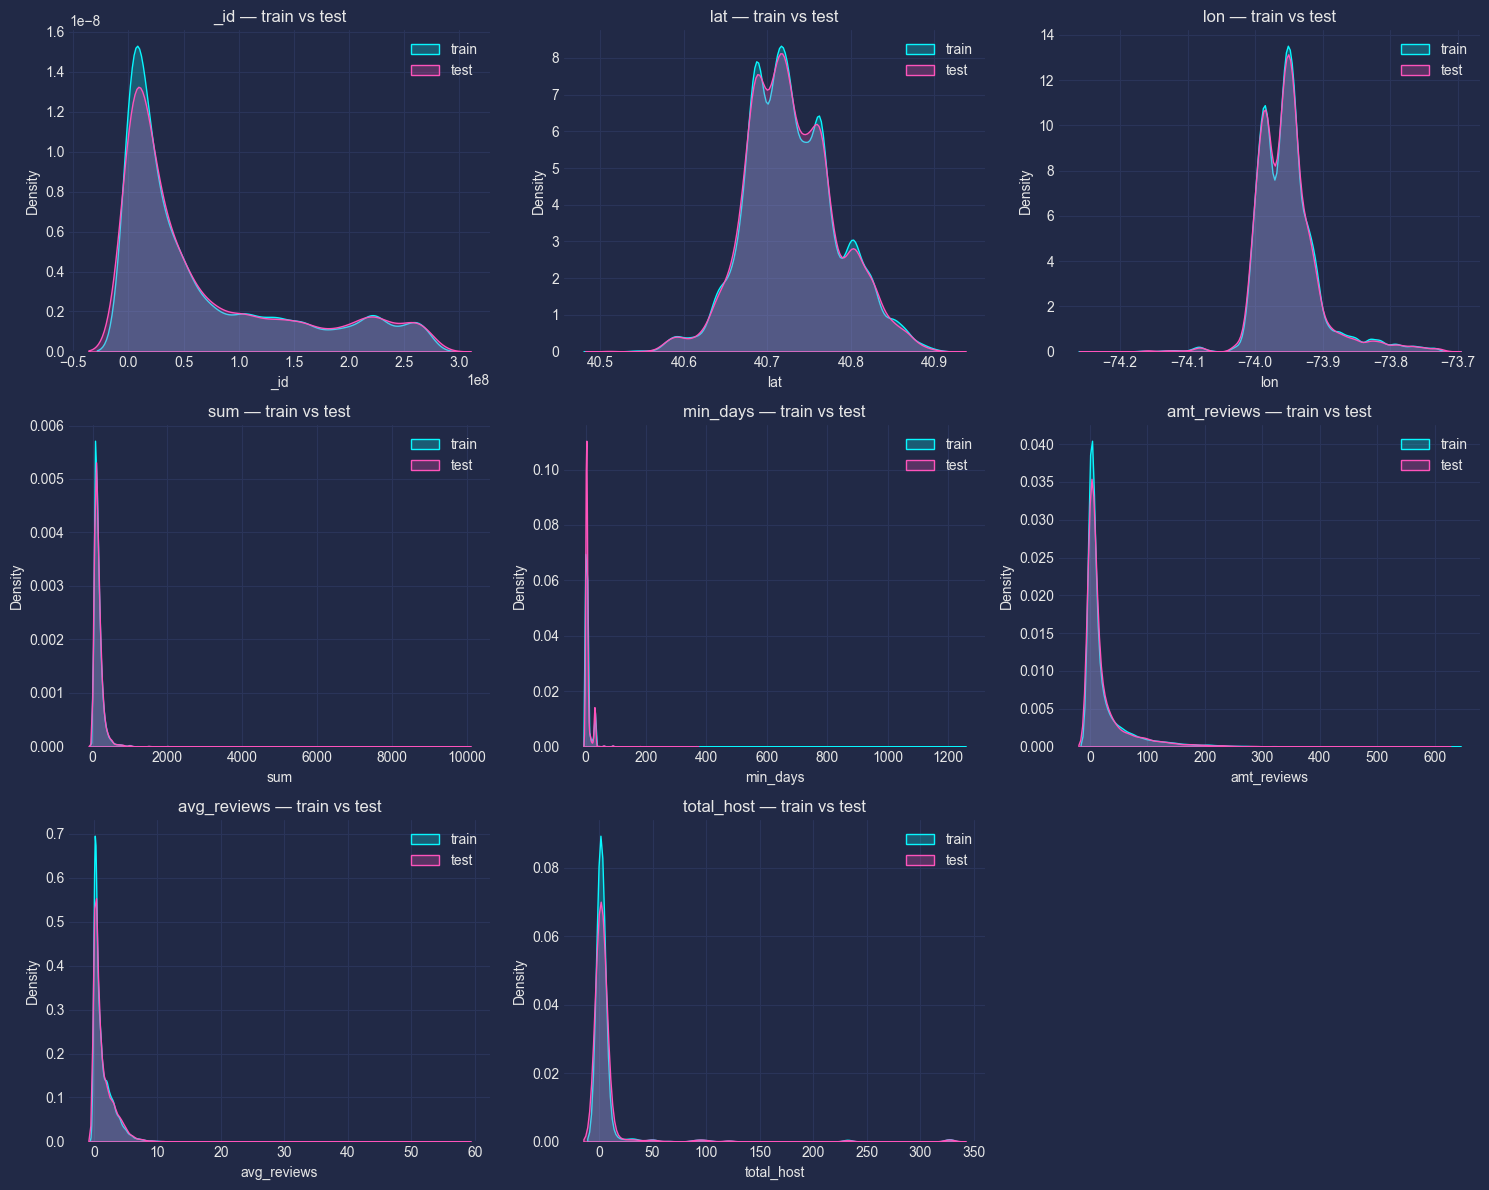

In [23]:
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

plot_idx = 0  # индекс для подграфика

for col in num_cols:
    if col == 'target':
        continue  # пропускаем таргет

    sns.kdeplot(train[col], label='train', fill=True, ax=axes[plot_idx])
    sns.kdeplot(test[col], label='test', fill=True, ax=axes[plot_idx])
    axes[plot_idx].set_title(f'{col} — train vs test')
    axes[plot_idx].legend()
    plot_idx += 1

# Удалим лишние пустые оси
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Вывод — сравнение распределений между train и test

1. Распределения всех признаков в `train` и `test` практически совпадают, что говорит об отсутствии ярко выраженного data drift. Это создаёт хорошие условия для обучения модели на `train` и последующего применения к `test`.
2. Географические признаки `lat` и `lon` имеют идентичные плотности, что подтверждает их стабильность во времени или между выборками.
3. Распределения признаков `sum`, `min_days`, `amt_reviews`, `avg_reviews`, `total_host` также совпадают с незначительными расхождениями в "хвостах", что может быть обусловлено выбросами, но не является критичным.
4. Признак `_id` ожидаемо неравномерный и неинформативный — его поведение не влияет на качество модели.
5. Визуальный анализ подтверждает, что данные в `test` и `train` сопоставимы по структуре, и не требуют дополнительного выравнивания или адаптации.

### Таргет

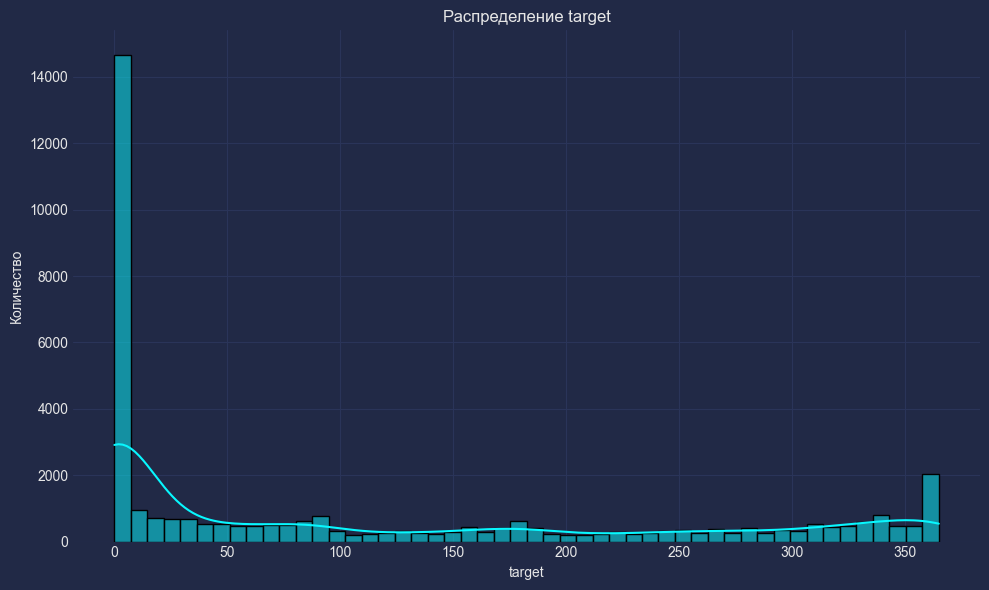

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(train['target'], bins=50, kde=True)
plt.title('Распределение target')
plt.xlabel('target')
plt.ylabel('Количество')
plt.grid(True)
plt.tight_layout()
plt.show()

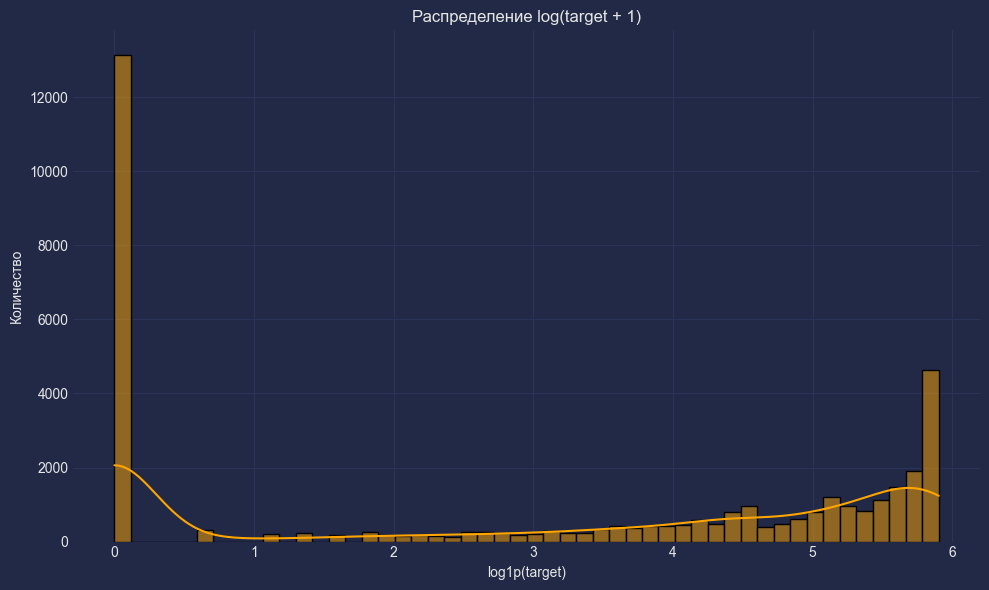

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(train['target']), bins=50, kde=True, color='orange')
plt.title('Распределение log(target + 1)')
plt.xlabel('log1p(target)')
plt.ylabel('Количество')
plt.grid(True)
plt.tight_layout()
plt.show()

## Разделение и предобработка

### Работа с предобработкой до разделения

Определяем функцию

In [26]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    df = df.drop(columns=['name', 'location_cluster', '_id'], errors='ignore')

    # Флаг пропуска по last_dt
    df['is_missing_last_dt'] = df['last_dt'].isna().astype(int)

    # Дальнейшая обработка last_dt
    df['last_dt'] = pd.to_datetime(df['last_dt'], errors='coerce')
    df['last_year'] = df['last_dt'].dt.year
    df['last_month'] = df['last_dt'].dt.month
    df['last_day'] = df['last_dt'].dt.day
    df['last_weekday'] = df['last_dt'].dt.weekday
    df.drop(columns='last_dt', inplace=True)

    # Флаг пропуска по avg_reviews
    df['is_missing_avg_reviews'] = df['avg_reviews'].isna().astype(int)

    # Заполнение пропущенных категориальных
    df['host_name'] = df['host_name'].fillna('Unknown_host')

    # Логарифмирование
    for col in ['sum', 'amt_reviews', 'avg_reviews']:
        df[col] = np.log1p(df[col])

    return df

Применяем к датасетам

In [27]:
train_df = preprocess(train)
test_df = preprocess(test)

### Разделение и дополнительная предобратботка

In [28]:
X = train_df.drop(columns='target')
y = train_df['target']
X_test = test_df.copy()

Определяем категориальный и числовые переменные

In [29]:
# Категориальные (object или category)
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Числовые (int и float)
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

#### Пишем общий ColumnTransformer через пайплайны

In [30]:
# Числовые признаки
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Категориальные признаки
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Общий ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

Попробовал в коде сделать некоторую оптимизации в качестве пробного варианта (это, в целом, видно и перед, и после) — из главного здесь то, что пропусчи в численных заполняются медианой, а категориальные при необходимости (то есть если задать кодировку, где она нужна - все модели, кроме CatBoost'а) кодируются через `OrdinalEncoder`, при котором на выходе получаем дискретные числовые значения. Далее все это передается в ColumnTransformer для удобной предобработки.

## Обучение моделей

Задаем словарь моделей, которые, как я считал, будут достаточно хорошо состыковываться для стекинга. К 4 из них применяем прописанный ColumnTransformer, CatBoost сможет спокойно работать уже с имеющимися данными, то есть дополнительных преобразований не нужно.

In [31]:
models = {
    'catboost': CatBoostRegressor(verbose=0, random_state=42),
    'lightgbm': Pipeline([
        ('preprocessor', preprocessor),
        ('model', LGBMRegressor(random_state=42))
    ]),
    'xgboost': Pipeline([
        ('preprocessor', preprocessor),
        ('model', XGBRegressor(random_state=42, verbosity=0))
    ]),
    'random_forest': Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'ridge': Pipeline([
        ('preprocessor', preprocessor),
        ('model', Ridge(alpha=1.0))
    ])
}

Баловаться с гиперпараметрами я не стал, так как это бы потребовало много времени, да и целью было просто реализовать стекинг.

### Получение Out-of-Fold предсказаний для стекинга

In [32]:
def get_oof_predictions(models, X, y, X_test, n_splits=5, random_state=42):
    """
    Возвращает:
    - oof_preds: out-of-fold предсказания для train (DataFrame)
    - test_preds: усреднённые предсказания для test (DataFrame)
    - test_folds_all: предсказания по фолдам для оценки эпистемической неопределённости (dict)
    """
    oof_preds = pd.DataFrame(index=X.index)
    test_preds = pd.DataFrame(index=X_test.index)
    test_folds_all = {}
    val_folds_all = {}

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    for name, model in tqdm(models.items(), desc="Модели"):
        oof = np.zeros(len(X))
        test_fold_preds = np.zeros((len(X_test), n_splits))
        val_fold_preds = np.zeros((len(X), n_splits))

        for fold, (train_idx, val_idx) in enumerate(tqdm(kf.split(X, y), total=n_splits, desc=f"{name} - фолды", leave=False)):
            X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
            X_val = X.iloc[val_idx]

            if name == 'catboost':
                cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
                model.fit(X_train, y_train, cat_features=cat_cols)
            else:
                model.fit(X_train, y_train)

            oof[val_idx] = model.predict(X_val)
            val_fold_preds[val_idx, fold] = model.predict(X_val)
            test_fold_preds[:, fold] = model.predict(X_test)

        oof_preds[name] = oof
        test_preds[name] = test_fold_preds.mean(axis=1)
        test_folds_all[name] = test_fold_preds
        val_folds_all[name] = val_fold_preds

    return oof_preds, test_preds, test_folds_all, val_folds_all

Применяем данную функцию

In [33]:
oof_preds, test_preds, test_folds_all, val_folds_all = get_oof_predictions(models, X, y, X_test)

Модели:   0%|          | 0/5 [00:00<?, ?it/s]

catboost - фолды:   0%|          | 0/5 [00:00<?, ?it/s]

lightgbm - фолды:   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1905
[LightGBM] [Info] Number of data points in the train set: 29336, number of used features: 14
[LightGBM] [Info] Start training from score 112.320800


C:\Users\MSI\env_py_3_12\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\MSI\env_py_3_12\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\MSI\env_py_3_12\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1897
[LightGBM] [Info] Number of data points in the train set: 29337, number of used features: 14
[LightGBM] [Info] Start training from score 112.621161


C:\Users\MSI\env_py_3_12\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\MSI\env_py_3_12\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\MSI\env_py_3_12\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1905
[LightGBM] [Info] Number of data points in the train set: 29337, number of used features: 14
[LightGBM] [Info] Start training from score 112.979343


C:\Users\MSI\env_py_3_12\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\MSI\env_py_3_12\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\MSI\env_py_3_12\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1905
[LightGBM] [Info] Number of data points in the train set: 29337, number of used features: 14
[LightGBM] [Info] Start training from score 113.445819


C:\Users\MSI\env_py_3_12\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\MSI\env_py_3_12\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\MSI\env_py_3_12\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1905
[LightGBM] [Info] Number of data points in the train set: 29337, number of used features: 14
[LightGBM] [Info] Start training from score 112.465999


C:\Users\MSI\env_py_3_12\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\MSI\env_py_3_12\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\MSI\env_py_3_12\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


xgboost - фолды:   0%|          | 0/5 [00:00<?, ?it/s]

random_forest - фолды:   0%|          | 0/5 [00:00<?, ?it/s]

ridge - фолды:   0%|          | 0/5 [00:00<?, ?it/s]

### Обучение мета-модели и её оценка

In [34]:
# Обучение мета-модели
meta_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=5,
    random_state=42,
    verbose=0
)

meta_model.fit(oof_preds, y)

# Предсказание
meta_preds = meta_model.predict(test_preds)

# Оценка на обучении
oof_pred_train = meta_model.predict(oof_preds)
print("MSE:", mean_squared_error(y, oof_pred_train))
print("R²:", r2_score(y, oof_pred_train))

MSE: 8846.579754279195
R²: 0.48904130065339513


Решил сразу применить CatBoost на мета-моделе, не тестируя другое, ибо он показал оптимальнее всего себя на этой задаче, даже без стекинга.

### Проверим на таргете тестовой выборки

In [35]:
submission = pd.DataFrame({
    'index': test.index,
    'prediction': meta_preds
})

submission.to_csv('stacking_submission.csv', index=False)

In [36]:
true = solution['prediction']
pred = submission['prediction']

print("MSE:", mean_squared_error(true, pred))
print("R²:", r2_score(true, pred))

MSE: 9527.288247788541
R²: 0.4510419671167226


Даже без `Optuna` результат MSE получился близким к результату с соревнования ML2, хоть и не дотягивает до результата с оптмальным значением, полученным через `Optuna` на чистом CatBoost'е.

## Оценка неопределенности и дополнительный анализ

Для удобности создал функции, добавив к ним описание

In [37]:
def calculate_uncertainty_train(model_name, oof_preds, y_true, val_folds_all):
    """
    Возвращает:
    - aleatoric_uncertainty: (train) — по квадрату ошибки
    - epistemic_uncertainty: (train) — дисперсия предсказаний модели на фолдах
    - total_uncertainty: сумма двух
    - abs_error: абсолютная ошибка
    """
    val_preds_folds = val_folds_all[model_name]  # (n_samples, n_folds)
    
    epistemic_uncertainty = np.var(val_preds_folds, axis=1)  # дисперсия по фолдам на валидации
    aleatoric_uncertainty = (oof_preds[model_name] - y_true) ** 2
    aleatoric_uncertainty = aleatoric_uncertainty.reindex_like(y_true)
    abs_error = np.abs(oof_preds[model_name] - y_true)
    
    total_uncertainty = aleatoric_uncertainty + epistemic_uncertainty

    return aleatoric_uncertainty, epistemic_uncertainty, total_uncertainty, abs_error

In [38]:
def evaluate_models(oof_preds, y_true):
    """
    Возвращает DataFrame с метриками MSE и R² для каждой модели
    """
    scores = {}
    for name in oof_preds.columns:
        mse = mean_squared_error(y_true, oof_preds[name])
        r2 = r2_score(y_true, oof_preds[name])
        scores[name] = {'MSE': mse, 'R²': r2}
    
    return pd.DataFrame(scores).T.sort_values('MSE')

In [39]:
def plot_uncertainty_vs_error(total_uncertainty, abs_error, model_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=total_uncertainty, y=abs_error, alpha=0.4)
    plt.xlabel("Total uncertainty")
    plt.ylabel("Absolute error")
    plt.title(f"Ошибка vs Суммарная неопределённость — {model_name}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Применяем эти функции

In [40]:
# Расчёт неопределённостей по train
al, ep, total, abs_err = calculate_uncertainty_train(
    model_name='catboost',
    oof_preds=oof_preds,
    y_true=y,
    val_folds_all=val_folds_all
)

# Оценка моделей
print("Метрики моделей:")
display(evaluate_models(oof_preds, y))

Метрики моделей:


,MSE,R²
catboost,9760.421741,0.436260
lightgbm,10406.098809,0.398967
random_forest,10414.622577,0.398475
xgboost,10709.088997,0.381467
ridge,13947.678230,0.194413


#### Вывод — Сравнение базовых моделей по метрикам MSE и R²

- CatBoost показал наилучшие результаты: наименьшее значение MSE (9760.42) и наибольшее R² (0.436). Это говорит о высокой точности модели и хорошем объяснении вариативности целевой переменной.
- LightGBM, Random Forest и XGBoost продемонстрировали схожие результаты, уступая CatBoost, но также показывают адекватное качество предсказаний.
- Ridge показал худшие результаты — как по MSE, так и по R². Линейная модель не справляется с задачей и не может захватить сложные зависимости в данных.

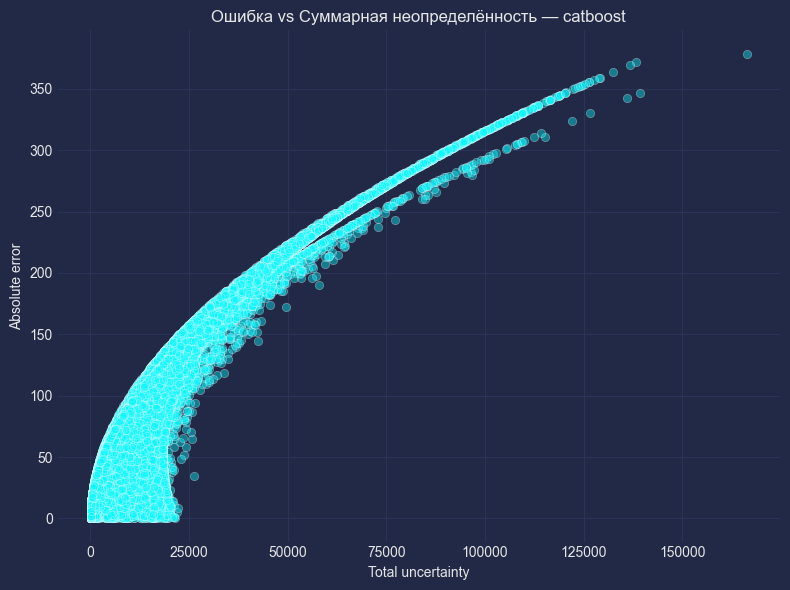

In [41]:
# График зависимости ошибки от суммарной неопределённости
plot_uncertainty_vs_error(total, abs_err, model_name='catboost')

#### Вывод — Зависимость ошибки от суммарной неопределённости (CatBoost)

- График демонстрирует чёткую зависимость между абсолютной ошибкой и суммарной неопределённостью. Чем выше неопределённость, тем выше ошибка модели.
- Это подтверждает, что модель способна оценивать уверенность в своих предсказаниях. Такая закономерность полезна для определения областей с потенциально высокой ошибкой.

In [42]:
def plot_all_uncertainty(epistemic_uncertainty, aleatoric_uncertainty, abs_error, model_name):
    """
    Строит два графика:
    - Алеаторная неопределённость vs Абсолютная ошибка (по train)
    - Эпистемическая неопределённость — просто распределение (по test)
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Алеаторная неопределённость vs ошибка (оба на train)
    sns.scatterplot(x=aleatoric_uncertainty, y=abs_error, alpha=0.4, ax=axes[0])
    axes[0].set_title(f"Алеаторная неопределённость — {model_name}")
    axes[0].set_xlabel("Aleatoric uncertainty")
    axes[0].set_ylabel("Absolute error")
    axes[0].grid(True)

    # Эпистемическая неопределённость — гистограмма
    sns.histplot(epistemic_uncertainty, bins=30, kde=True, ax=axes[1])
    axes[1].set_title(f"Эпистемическая неопределённость — {model_name}")
    axes[1].set_xlabel("Epistemic uncertainty")
    axes[1].set_ylabel("Частота")
    axes[1].grid(True)

    plt.suptitle("Анализ неопределённости", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

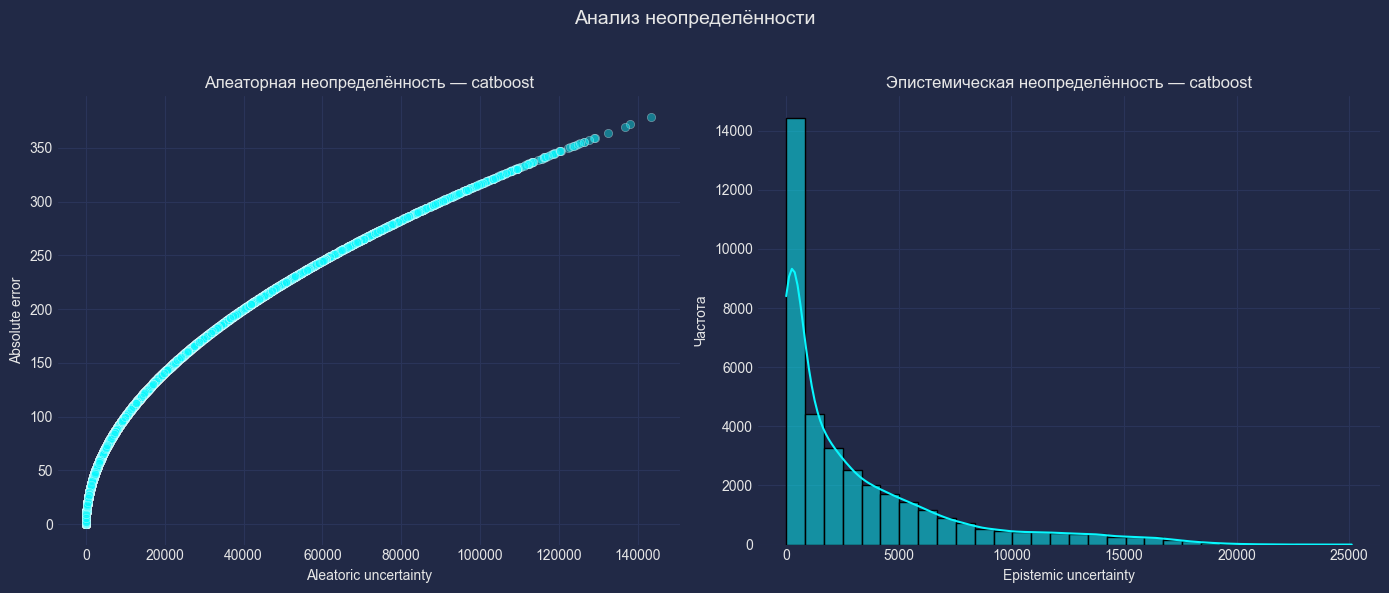

In [43]:
plot_all_uncertainty(epistemic_uncertainty=ep, aleatoric_uncertainty=al, abs_error=abs_err, model_name='catboost')

#### Вывод — Анализ алеаторной и эпистемической неопределённости (CatBoost)

- Алеаторная неопределённость имеет выраженную зависимость от абсолютной ошибки. Это говорит о том, что ошибка модели обусловлена не только самой моделью, но и свойствами данных (шум, нестабильность).
- Эпистемическая неопределённость распределена неравномерно. Основная масса наблюдений характеризуется низкой модельной неопределённостью, однако присутствуют редкие случаи с высокой неопределённостью. Это свидетельствует о зонах в пространстве признаков, где модель чувствует нехватку информации.

## Общие выводы

1. **Стекинг-модель не превзошла лучшие отдельные модели** <br>
   Несмотря на то, что стекинг объединяет предсказания нескольких сильных моделей, мета-модель (CatBoostRegressor) показала себя хуже, чем отдельно обученный CatBoost с настройкой гиперпараметров.

   Возможные причины:
   - недостаточная сложность мета-модели;
   - неравномерный вклад отдельных моделей;
   - отсутсвие оптимизации гиперпараметров при данном обучении/стекинге;
   - отсутствие дополнительной инженерии признаков для мета-модели.
    <br><br>

3. **Алеаторная неопределённость отражает шумность данных** <br>
   Эта метрика была рассчитана на основе out-of-fold предсказаний на обучающей выборке. График зависимости абсолютной ошибки от алеаторной неопределённости показывает прямую зависимость: при росте неопределённости растёт и ошибка, что говорит о наличии шума или нестабильных признаков.

4. **Эпистемическая неопределённость отражает неуверенность модели** <br>
Расчёт этой метрики выполнен как дисперсия предсказаний по фолдам. Распределение показывает, что большинство объектов предсказываются моделью с высокой уверенностью, но встречаются случаи с высокой эпистемической неопределённостью, что может говорить о нехватке информации в обучении на отдельных участках пространства признаков.

5. **Суммарная неопределённость помогает выявлять проблемные точки** <br>
   Сумма алеаторной и эпистемической неопределённостей хорошо коррелирует с ошибками модели. Это подтверждает, что оценка неопределённости может использоваться для выявления наблюдений, в которых модель потенциально ошибается.

6. **Дополнительное наблюдение** <br>
    Логарифмирование таргета значительно ухудшает ошибку MSE в изначальных единицах, так что в конечном счете я выбрал вариант без логарифмирования таргета. Также по сравнению с ML2 я убрал несколько лишних признаков, минимизировав мультиколлинеарность еще на этапе первоначальной предобработки.